In [5]:
import pandas as pd

In [6]:
df=pd.read_csv("fact_bookings.csv")
df.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [7]:
df.shape

(134590, 12)

In [8]:
df.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [9]:
df.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

<Axes: xlabel='booking_platform'>

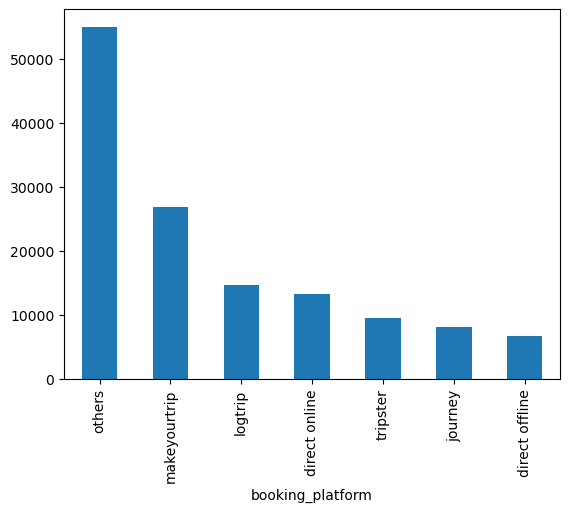

In [10]:
df.booking_platform.value_counts().plot(kind="bar")

In [11]:
df.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


# Data Cleaning

In [12]:
df[df.no_guests<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [13]:
df=df[df.no_guests>0]
df

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [14]:
avg,std=df.revenue_generated.mean(),df.revenue_generated.std() 
#std stands for standard deviation
avg,std

(15378.036937686695, 93040.15493143328)

In [15]:
lower_limit=avg-3*std
lower_limit

-263742.4278566132

In [16]:
higher_limit=avg + 3*std
higher_limit

294498.50173198653

In [17]:
df[df.revenue_generated<0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [18]:
df[df.revenue_generated>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [19]:
df=df[df.revenue_generated<higher_limit]
df.shape

(134573, 12)

In [20]:
higher_limit2=df.revenue_realized.mean()+3*df.revenue_realized.std()
higher_limit2

33479.3586618449

In [21]:
 df[df.revenue_realized>higher_limit2]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-22,31-07-22,2/8/2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


In [22]:
df[df.room_category=="RT4"].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

1.In aggregate bookings find column that have null values with whatever you think is appropiate subtitute(possible way to use mean or median)

In [23]:
df.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

# Data Transformation

In [24]:
df_agg=pd.read_csv("aggregated_bookings.csv")
df_agg.tail()

,property_id,check_in_date,room_category,successful_bookings,capacity
9195,16563,31-Jul-22,RT4,13,18.0
9196,16559,31-Jul-22,RT4,13,18.0
9197,17558,31-Jul-22,RT4,3,6.0
9198,19563,31-Jul-22,RT4,3,6.0
9199,17561,31-Jul-22,RT4,3,4.0


In [25]:
df_agg["occ_pct"]=df_agg["successful_bookings"]/df_agg["capacity"]
df_agg.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667
3,17558,1-May-22,RT1,30,19.0,1.578947
4,16558,1-May-22,RT1,18,19.0,0.947368


In [26]:
df_agg["occ_pct"]=df_agg["occ_pct"].apply(lambda x:round(x*100,2))
df_agg.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
3,17558,1-May-22,RT1,30,19.0,157.89
4,16558,1-May-22,RT1,18,19.0,94.74


# Insights generation

In [27]:
#Average occupancy rate
df_agg.groupby("room_category")["occ_pct"].mean().round(3)

room_category
RT1    58.224
RT2    58.040
RT3    58.028
RT4    59.300
Name: occ_pct, dtype: float64

In [28]:
df_room=pd.read_csv("dim_rooms.csv")
df_room

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [32]:
df=pd.merge(df_agg,df_room, left_on="room_category", right_on="room_id")
df.tail()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
9195,16563,31-Jul-22,RT4,13,18.0,72.22,RT4,Presidential
9196,16559,31-Jul-22,RT4,13,18.0,72.22,RT4,Presidential
9197,17558,31-Jul-22,RT4,3,6.0,50.00,RT4,Presidential
9198,19563,31-Jul-22,RT4,3,6.0,50.00,RT4,Presidential
9199,17561,31-Jul-22,RT4,3,4.0,75.00,RT4,Presidential


In [30]:
df.groupby("room_class")["occ_pct"].mean().round(3)

room_class
Elite           58.040
Premium         58.028
Presidential    59.300
Standard        58.224
Name: occ_pct, dtype: float64

In [31]:
df.drop("room_id",axis=1,inplace=True)
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard
3,17558,1-May-22,RT1,30,19.0,157.89,Standard
4,16558,1-May-22,RT1,18,19.0,94.74,Standard


In [33]:
df_hotel=pd.read_csv("dim_hotels.csv")
df_hotel.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [35]:
#Print average occupancy rate per city.
df=pd.merge(df,df_hotel, on="property_id")
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class,property_name_x,category_x,city_x,property_name_y,category_y,city_y
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard,Atliq Exotica,Luxury,Mumbai,Atliq Exotica,Luxury,Mumbai
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard,Atliq Bay,Luxury,Bangalore,Atliq Bay,Luxury,Bangalore
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard,Atliq Palace,Business,Bangalore,Atliq Palace,Business,Bangalore


<Axes: xlabel='city_x'>

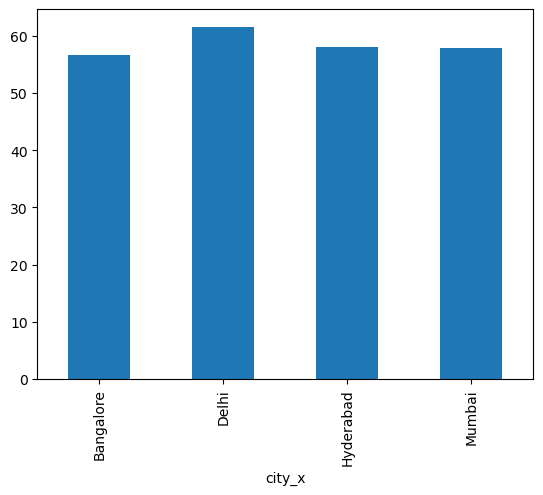

In [39]:
df.groupby("city_x")["occ_pct"].mean().plot(kind="bar")

In [40]:
df_date=pd.read_csv("dim_date.csv")
df_date.head(3)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday


In [45]:
#When was the occupancy better? Weekday or Weekend?
df=pd.merge(df,df_date,left_on="check_in_date",right_on="date")
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class,property_name_x,category_x,...,category_y,city_y,date_x,mmm yy_x,week no_x,day_type_x,date_y,mmm yy_y,week no_y,day_type_y
0,19563,10-May-22,RT3,15,29.0,51.72,RT3,Premium,Atliq Palace,Business,...,Business,Bangalore,10-May-22,May 22,W 20,weekeday,10-May-22,May 22,W 20,weekeday
1,18560,10-May-22,RT1,19,30.0,63.33,RT1,Standard,Atliq City,Business,...,Business,Hyderabad,10-May-22,May 22,W 20,weekeday,10-May-22,May 22,W 20,weekeday
2,19562,10-May-22,RT1,18,30.0,60.00,RT1,Standard,Atliq Bay,Luxury,...,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday,10-May-22,May 22,W 20,weekeday


In [47]:
df.groupby("day_type_y")["occ_pct"].mean()

day_type_y
weekeday    50.903780
weekend     72.393432
Name: occ_pct, dtype: float64

In [49]:
#in the month of june what is the occupancy for dfferent cities.
df["mmm yy_y"].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [52]:
df_june=df[df["mmm yy_y"]=="Jun 22"]
df_june.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class,property_name_x,category_x,...,category_y,city_y,date_x,mmm yy_x,week no_x,day_type_x,date_y,mmm yy_y,week no_y,day_type_y
2200,16559,10-Jun-22,RT1,20,30.0,66.67,RT1,Standard,Atliq Exotica,Luxury,...,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday,10-Jun-22,Jun 22,W 24,weekeday
2201,19562,10-Jun-22,RT1,19,30.0,63.33,RT1,Standard,Atliq Bay,Luxury,...,Luxury,Bangalore,10-Jun-22,Jun 22,W 24,weekeday,10-Jun-22,Jun 22,W 24,weekeday
2202,19563,10-Jun-22,RT1,17,30.0,56.67,RT1,Standard,Atliq Palace,Business,...,Business,Bangalore,10-Jun-22,Jun 22,W 24,weekeday,10-Jun-22,Jun 22,W 24,weekeday


In [57]:
df_june.groupby("city_y")["occ_pct"].mean().sort_values(ascending=False)

city_y
Delhi        62.474286
Hyderabad    58.458075
Mumbai       58.382560
Bangalore    56.578552
Name: occ_pct, dtype: float64

In [58]:
df_august=pd.read_csv("new_data_august.csv")
df_august.head(3)

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67


In [59]:
df_august.shape

(7, 13)

In [60]:
new_df=pd.concat([df,df_august],ignore_index=True,axis=0) #axis=0 mean concat row-wise
new_df.tail()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class,property_name_x,category_x,...,mmm yy_y,week no_y,day_type_y,property_name,category,city,mmm yy,week no,day_type,occ%
6502,19563,01-Aug-22,RT1,23,30.0,NaN,NaN,Standard,NaN,NaN,...,NaN,NaN,NaN,Atliq Palace,Business,Bangalore,Aug-22,W 32,weekeday,76.67
6503,19558,01-Aug-22,RT1,30,40.0,NaN,NaN,Standard,NaN,NaN,...,NaN,NaN,NaN,Atliq Grands,Luxury,Bangalore,Aug-22,W 32,weekeday,75.00
6504,19560,01-Aug-22,RT1,20,26.0,NaN,NaN,Standard,NaN,NaN,...,NaN,NaN,NaN,Atliq City,Business,Bangalore,Aug-22,W 32,weekeday,76.92
6505,17561,01-Aug-22,RT1,18,26.0,NaN,NaN,Standard,NaN,NaN,...,NaN,NaN,NaN,Atliq Blu,Luxury,Mumbai,Aug-22,W 32,weekeday,69.23
6506,17564,01-Aug-22,RT1,10,16.0,NaN,NaN,Standard,NaN,NaN,...,NaN,NaN,NaN,Atliq Seasons,Business,Mumbai,Aug-22,W 32,weekeday,62.50


In [66]:
#Print revenue realized per city.
df_hotel.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [84]:
df_booking=pd.read_csv("fact_bookings.csv")
df_booking.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100


In [85]:
df_booking_all=pd.merge(df_booking,df_hotel, on="property_id")
df_booking_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100,Atliq Grands,Luxury,Delhi


In [86]:
df_booking_all.groupby("city") ["revenue_realized"].sum().sort_values()

city
Delhi        294500318
Hyderabad    325232870
Bangalore    420397050
Mumbai       668640991
Name: revenue_realized, dtype: int64

Print month by month revenue

In [87]:
df["mmm yy_y"].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [91]:
df_booking_all.head(1)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi


In [95]:
df_booking_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134590 non-null  object 
 1   property_id        134590 non-null  int64  
 2   booking_date       134590 non-null  object 
 3   check_in_date      134590 non-null  object 
 4   checkout_date      134590 non-null  object 
 5   no_guests          134587 non-null  float64
 6   room_category      134590 non-null  object 
 7   booking_platform   134590 non-null  object 
 8   ratings_given      56683 non-null   float64
 9   booking_status     134590 non-null  object 
 10  revenue_generated  134590 non-null  int64  
 11  revenue_realized   134590 non-null  int64  
 12  property_name      134590 non-null  object 
 13  category           134590 non-null  object 
 14  city               134590 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 1

In [92]:
df.head(1)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class,property_name_x,category_x,...,category_y,city_y,date_x,mmm yy_x,week no_x,day_type_x,date_y,mmm yy_y,week no_y,day_type_y
0,19563,10-May-22,RT3,15,29.0,51.72,RT3,Premium,Atliq Palace,Business,...,Business,Bangalore,10-May-22,May 22,W 20,weekeday,2022-05-10,May 22,W 20,weekeday


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   property_id          6500 non-null   int64         
 1   check_in_date        6500 non-null   object        
 2   room_category        6500 non-null   object        
 3   successful_bookings  6500 non-null   int64         
 4   capacity             6500 non-null   float64       
 5   occ_pct              6500 non-null   float64       
 6   room_id              6500 non-null   object        
 7   room_class           6500 non-null   object        
 8   property_name_x      6500 non-null   object        
 9   category_x           6500 non-null   object        
 10  city_x               6500 non-null   object        
 11  property_name_y      6500 non-null   object        
 12  category_y           6500 non-null   object        
 13  city_y               6500 non-nul

In [97]:
# Convert columns to datetime
df_booking_all['check_in_date'] = pd.to_datetime(df_booking_all['check_in_date'], errors='coerce', dayfirst=True)
df['date_y'] = pd.to_datetime(df['date_y'], errors='coerce')

# Perform the merge
merged_df = pd.merge(df_booking_all, df, left_on="check_in_date", right_on="date_y")

# Display result
merged_df.head(3)


,booking_id,property_id_x,booking_date,check_in_date_x,checkout_date,no_guests,room_category_x,booking_platform,ratings_given,booking_status,...,category_y,city_y,date_x,mmm yy_x,week no_x,day_type_x,date_y,mmm yy_y,week no_y,day_type_y
0,May102216558RT11,16558,19-04-22,2022-05-10,12/5/2022,2.0,RT1,others,5.0,Checked Out,...,Business,Bangalore,10-May-22,May 22,W 20,weekeday,2022-05-10,May 22,W 20,weekeday
1,May102216558RT11,16558,19-04-22,2022-05-10,12/5/2022,2.0,RT1,others,5.0,Checked Out,...,Business,Hyderabad,10-May-22,May 22,W 20,weekeday,2022-05-10,May 22,W 20,weekeday
2,May102216558RT11,16558,19-04-22,2022-05-10,12/5/2022,2.0,RT1,others,5.0,Checked Out,...,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday,2022-05-10,May 22,W 20,weekeday


In [81]:
df_date["date"]=pd.to_datetime(df_date["date"])
df_date.head(3)

C:\Users\subhadeep\AppData\Local\Temp\ipykernel_21056\1847724004.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_date["date"]=pd.to_datetime(df_date["date"])


,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday


In [98]:
df_booking_all["check_in_date"]=pd.to_datetime(df_booking_all["check_in_date"])
df_booking_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT11,16558,27-04-22,2022-05-01,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi
1,May012216558RT12,16558,30-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
2,May012216558RT13,16558,28-04-22,2022-05-01,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100,Atliq Grands,Luxury,Delhi


In [99]:
df_date.head(1)

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend


In [110]:
 df_booking_all=pd.merge(df_booking_all,df_date, left_on="check_in_date",right_on="date")
df_booking_all.head(2)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,...,category,city,date_x,mmm yy_x,week no_x,day_type_x,date_y,mmm yy_y,week no_y,day_type_y
0,May012216558RT11,16558,27-04-22,2022-05-01,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,...,Luxury,Delhi,2022-05-01,May 22,W 19,weekend,2022-05-01,May 22,W 19,weekend
1,May012216558RT12,16558,30-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,...,Luxury,Delhi,2022-05-01,May 22,W 19,weekend,2022-05-01,May 22,W 19,weekend


In [102]:
df_booking_all.groupby("mmm yy")["revenue_realized"].sum()

mmm yy
Jul 22    243180932
Jun 22    229644140
May 22    234516453
Name: revenue_realized, dtype: int64

# Print avg rating per city

In [105]:
avg=df_booking_all.ratings_given.mean() 
avg

3.6215005121201775

In [108]:
avg_rating=df_booking_all.groupby('city')['ratings_given'].mean().sort_values()
avg_rating

city
Bangalore    3.414599
Hyderabad    3.654123
Mumbai       3.655835
Delhi        3.787587
Name: ratings_given, dtype: float64

# Print revenue realized per hotel type

In [109]:
avg_rev=df_booking_all.groupby('category')['revenue_generated'].sum()
avg_rev

category
Business    318931095
Luxury      565222670
Name: revenue_generated, dtype: int64

# Print a pie chart of revenue realized per booking platforfm

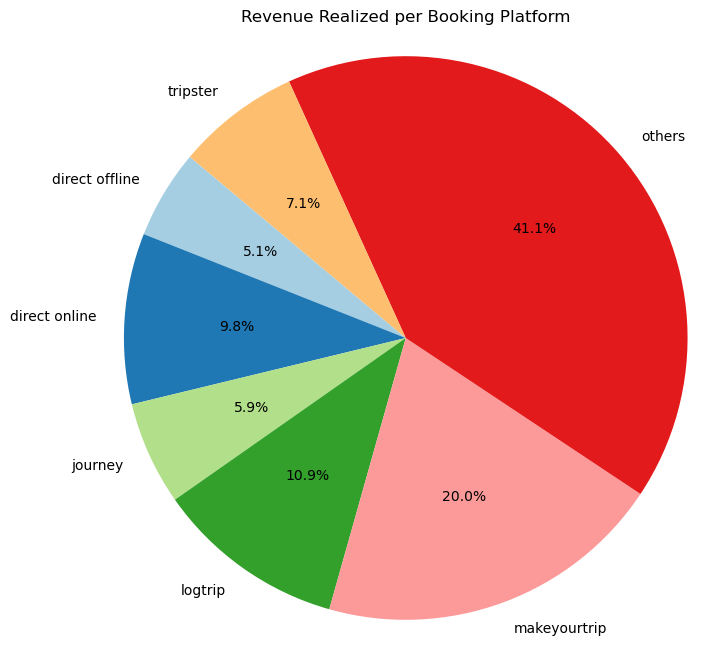

In [112]:
import matplotlib.pyplot as plt
revenue_by_platform = df_booking_all.groupby('booking_platform')['revenue_realized'].sum()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(revenue_by_platform, labels=revenue_by_platform.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Revenue Realized per Booking Platform')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()